In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("auto_clean.csv")
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [4]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


### We have two seperate columns for Diesel and gas, but we consider any one if its 1 for column gas and 0 in same column would indicate diesel.
### Will drop dielsel column for our dataset

In [5]:
data=data.drop(labels="diesel",axis=1)
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,1


In [6]:
#checking for Nan values
data[data.isna().any(axis=1) | data.isnull().any(axis=1)]

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,gas
46,0,122,jaguar,std,two,sedan,rwd,front,102.0,0.921192,...,2.76,11.5,262.0,5000.0,13,17,36000.0,18.076923,NaN,1
52,3,150,mazda,std,two,hatchback,rwd,front,95.3,0.812110,...,NaN,9.4,101.0,6000.0,17,23,10945.0,13.823529,Low,1
53,3,150,mazda,std,two,hatchback,rwd,front,95.3,0.812110,...,NaN,9.4,101.0,6000.0,17,23,11845.0,13.823529,Low,1
54,3,150,mazda,std,two,hatchback,rwd,front,95.3,0.812110,...,NaN,9.4,101.0,6000.0,17,23,13645.0,13.823529,Low,1
55,3,150,mazda,std,two,hatchback,rwd,front,95.3,0.812110,...,NaN,9.4,135.0,6000.0,16,23,15645.0,14.687500,Medium,1


In [7]:
#Changing null values in column stroke
data["stroke"]=data["stroke"].replace(np.NaN,round(data["stroke"].mean(),2))
#data["stroke"].replace(np.NaN,np.mean(data["stroke"]))
data["stroke"].unique()

array([2.68, 3.47, 3.4 , 2.8 , 3.19, 3.39, 3.03, 3.11, 3.23, 3.46, 3.9 ,
       3.41, 3.07, 3.58, 4.17, 2.76, 3.15, 3.26, 3.16, 3.64, 3.1 , 3.35,
       3.12, 3.86, 3.29, 3.27, 3.52, 2.19, 3.21, 2.9 , 2.07, 2.36, 2.64,
       3.08, 3.5 , 3.54, 2.87])

In [8]:
##Lets change the Nan value of column Horsepower-binned
data.groupby("horsepower-binned").mean()["horsepower"]


horsepower-binned
High      174.782609
Low        78.026087
Medium    121.443747
Name: horsepower, dtype: float64

In [9]:
### the horsepower of null value in horsepower-pinned is 262 which more than the mean horsepower of HIGH
### Replacing the Nan in horsepower-binned as high
data["horsepower-binned"]=data["horsepower-binned"].replace(np.NaN,"High")
data["horsepower-binned"].unique()

array(['Medium', 'Low', 'High'], dtype=object)

### Converting categorical data into numeric

In [10]:
cat_data=data.select_dtypes(exclude=np.number)
cat_data

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
0,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
1,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
2,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi,Medium
3,audi,std,four,sedan,fwd,front,ohc,four,mpfi,Medium
4,audi,std,four,sedan,4wd,front,ohc,five,mpfi,Medium
...,...,...,...,...,...,...,...,...,...,...
196,volvo,std,four,sedan,rwd,front,ohc,four,mpfi,Medium
197,volvo,turbo,four,sedan,rwd,front,ohc,four,mpfi,High
198,volvo,std,four,sedan,rwd,front,ohcv,six,mpfi,Medium
199,volvo,turbo,four,sedan,rwd,front,ohc,six,idi,Medium


In [11]:
#getting all the unique values of categorical columns
cat_data_unique_values={cat_data.columns[x]:list(cat_data[cat_data.columns[x]].unique()) for x in range(len(cat_data.columns))}
cat_data_unique_values

{'make': ['alfa-romero',
  'audi',
  'bmw',
  'chevrolet',
  'dodge',
  'honda',
  'isuzu',
  'jaguar',
  'mazda',
  'mercedes-benz',
  'mercury',
  'mitsubishi',
  'nissan',
  'peugot',
  'plymouth',
  'porsche',
  'renault',
  'saab',
  'subaru',
  'toyota',
  'volkswagen',
  'volvo'],
 'aspiration': ['std', 'turbo'],
 'num-of-doors': ['two', 'four'],
 'body-style': ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
 'drive-wheels': ['rwd', 'fwd', '4wd'],
 'engine-location': ['front', 'rear'],
 'engine-type': ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'],
 'num-of-cylinders': ['four',
  'six',
  'five',
  'three',
  'twelve',
  'two',
  'eight'],
 'fuel-system': ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
 'horsepower-binned': ['Medium', 'Low', 'High']}

#### From above unique values of categorical columns, we can encode them in some ways
    num-of-doors,num-of-cylinders as text to number
    horsepower-binned as Rank encoding
    and rest of the columns in label encoding

In [12]:
##num-of-doors,num-of-cylinders as text to number
from word2number import w2n
cat_data["num-of-doors"]=[w2n.word_to_num(cat_data.iloc[i,2]) for i in range(cat_data.shape[0])]
cat_data["num-of-cylinders"]=[w2n.word_to_num(cat_data.iloc[i,7]) for i in range(cat_data.shape[0])]
cat_data.head()

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
0,alfa-romero,std,2,convertible,rwd,front,dohc,4,mpfi,Medium
1,alfa-romero,std,2,convertible,rwd,front,dohc,4,mpfi,Medium
2,alfa-romero,std,2,hatchback,rwd,front,ohcv,6,mpfi,Medium
3,audi,std,4,sedan,fwd,front,ohc,4,mpfi,Medium
4,audi,std,4,sedan,4wd,front,ohc,5,mpfi,Medium


In [13]:
#horsepower-binned
cat_data["horsepower-binned"]=cat_data["horsepower-binned"].replace(["High","Medium","Low"],[1,2,3])
cat_data.head()

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
0,alfa-romero,std,2,convertible,rwd,front,dohc,4,mpfi,2
1,alfa-romero,std,2,convertible,rwd,front,dohc,4,mpfi,2
2,alfa-romero,std,2,hatchback,rwd,front,ohcv,6,mpfi,2
3,audi,std,4,sedan,fwd,front,ohc,4,mpfi,2
4,audi,std,4,sedan,4wd,front,ohc,5,mpfi,2


In [14]:
##label encoding
from sklearn.preprocessing import LabelEncoder
labelencode=LabelEncoder()
for x in range(len(cat_data.columns)):
    if cat_data.columns[x] not in ["num-of-doors","num-of-cylinders","horsepower-binned"]:
        cat_data[cat_data.columns[x]]=labelencode.fit_transform(cat_data[cat_data.columns[x]])

cat_data.head()

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
0,0,0,2,0,2,0,0,4,5,2
1,0,0,2,0,2,0,0,4,5,2
2,0,0,2,2,2,0,4,6,5,2
3,1,0,4,3,1,0,2,4,5,2
4,1,0,4,3,0,0,2,5,5,2


In [15]:
datax=data.copy()
for x in range(len(cat_data.columns)):
    datax[cat_data.columns[x]]=cat_data[cat_data.columns[x]]

datax.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,gas
0,3,122,0,0,2,0,2,0,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,2,1
1,3,122,0,0,2,0,2,0,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,2,1
2,1,122,0,0,2,2,2,0,94.5,0.822681,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,2,1
3,2,164,1,0,4,3,1,0,99.8,0.848630,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,2,1
4,2,164,1,0,4,3,0,0,99.4,0.848630,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,2,1


##### Lets find the distribution of data over columns

In [16]:
#plt.figure()
#sns.pairplot(datax)

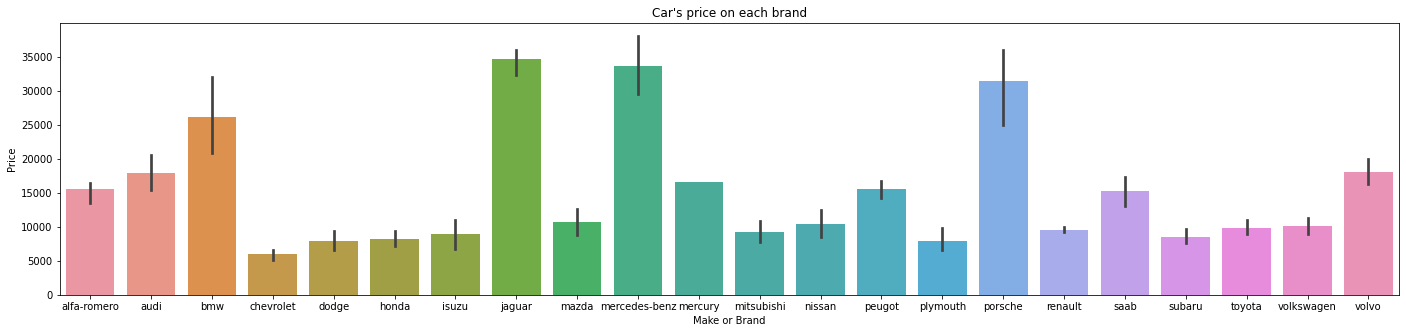

In [17]:
plt.figure(figsize=(24,5))
sns.barplot(x=data["make"],y=datax["price"])
plt.xlabel("Make or Brand")
plt.ylabel("Price")
plt.title("Car's price on each brand")
plt.show()

Text(0.5, 1.0, "Car's price on each brand")

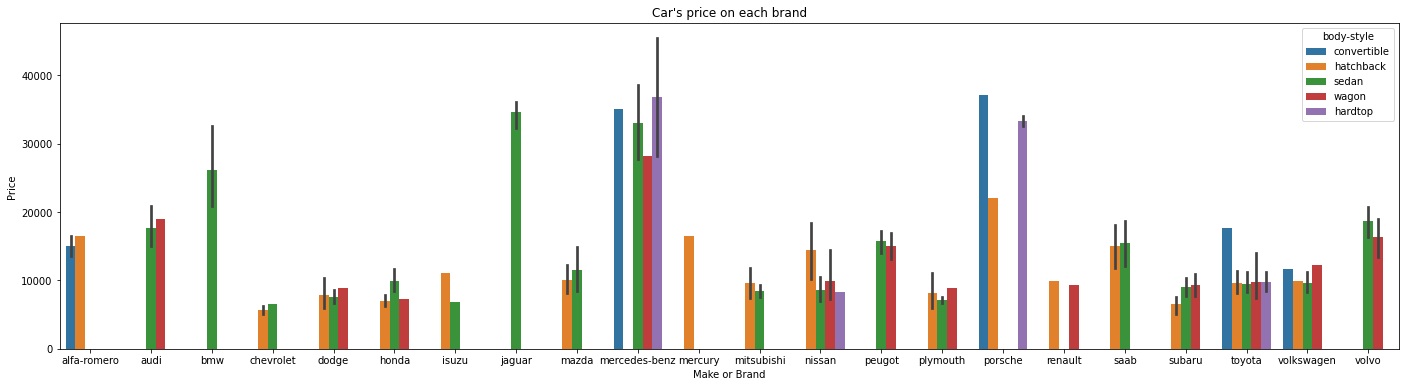

In [18]:
plt.figure(figsize=(24,6))
sns.barplot(x=data["make"],y=datax["price"],hue=data["body-style"])
sns.set_palette("Paired",20)
plt.xlabel("Make or Brand")
plt.ylabel("Price")
#plt.legend()
plt.title("Car's price on each brand")


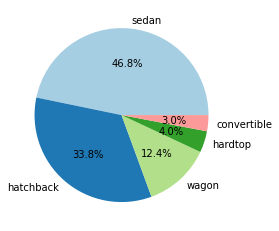

In [19]:
plt.pie(data["body-style"].value_counts().values,labels=data["body-style"].value_counts().index,autopct="%.1f%%")
plt.show()

Text(0.5, 1.0, 'Fuel Vs Price')

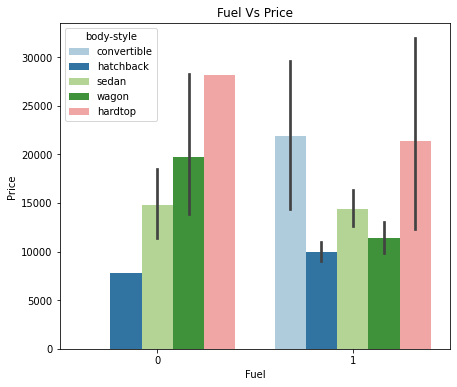

In [20]:

plt.figure(figsize=(7,6))
plots=sns.barplot(x=data["gas"],y=datax["price"],hue=data["body-style"])
sns.set_palette("Pastel1",10)
    
plt.xlabel("Fuel")
plt.ylabel("Price")
plt.title("Fuel Vs Price")


    BMW, Jaguar, Benz, Porsche are the brands which sales Costliest cars above 25000.
    Alfa-romero,Audi,mercury,peugot,saab,volvo are the brands which sales medium price range of cars.
    Chevrolet,dodge,honda,isuzu,mazda,mistubishi,nissan,plymouth,renault,subaru,toyota,volkswagen are 
    the brands sales budget range of cars comparing to other.

    Hard-top is the first most standard costliest car and covertible is the second most costliest car which was sold by few brands benz, nissan, porsche and toyota.
    Sedan is the commonly sold cars across all the brands and its prizes varies depending on the brands and aspirations.
    Diesel cars are costlier than gas fuel cars of any body-style.


 


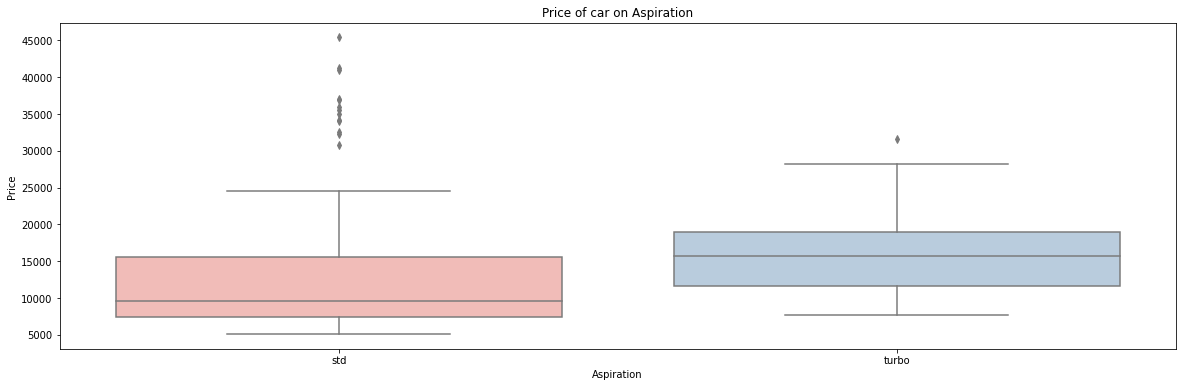

In [21]:
plt.figure(figsize=(20,6))
plots=sns.boxplot(x=data["aspiration"],y=datax["price"])
sns.set_palette("Pastel1",10)
    
plt.xlabel("Aspiration")
plt.ylabel("Price")
plt.title("Price of car on Aspiration")
plt.show()



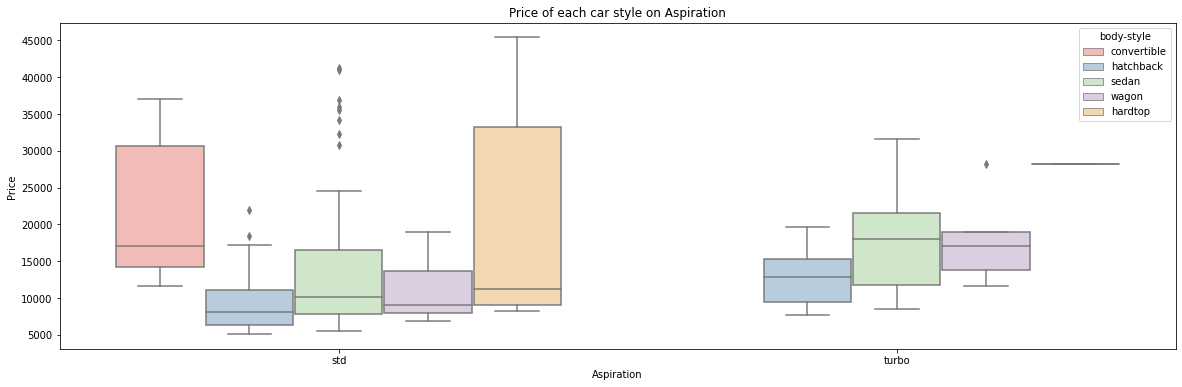

In [22]:
plt.figure(figsize=(20,6))
plots=sns.boxplot(x=data["aspiration"],y=datax["price"],hue=data["body-style"])
sns.set_palette("Pastel1",10)
    
plt.xlabel("Aspiration")
plt.ylabel("Price")
plt.title("Price of each car style on Aspiration")
plt.show()



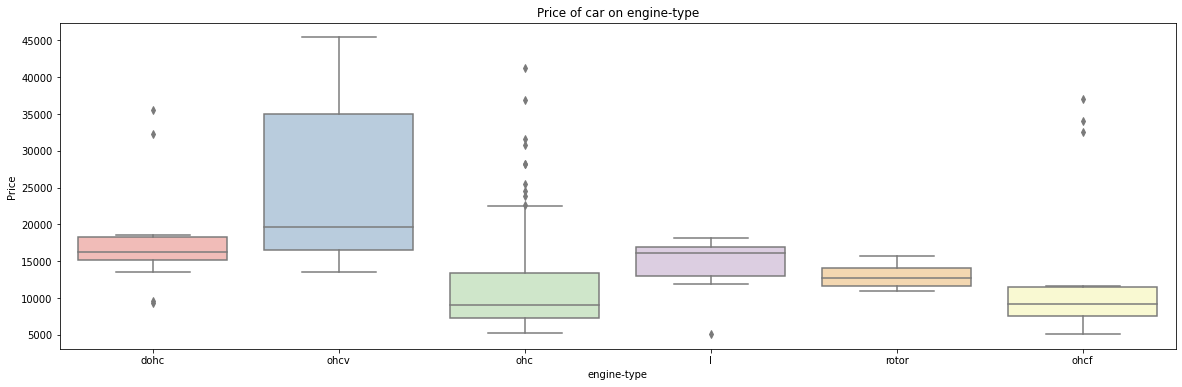

In [23]:
plt.figure(figsize=(20,6))
plots=sns.boxplot(x=data["engine-type"],y=datax["price"])
sns.set_palette("Pastel1",10)
    
plt.xlabel("engine-type")
plt.ylabel("Price")
plt.title("Price of car on engine-type")
plt.show()



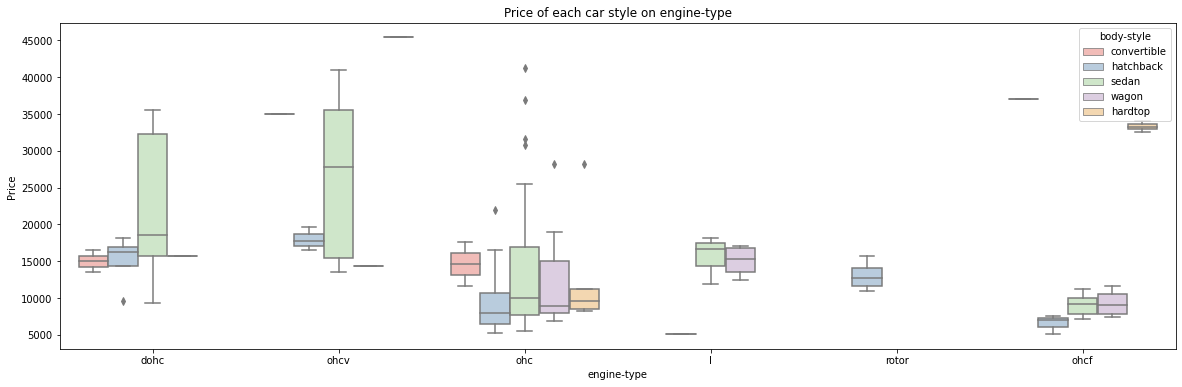

In [24]:
plt.figure(figsize=(20,6))
plots=sns.boxplot(x=data["engine-type"],y=datax["price"],hue=data["body-style"])
sns.set_palette("Pastel1",10)
    
plt.xlabel("engine-type")
plt.ylabel("Price")
plt.title("Price of each car style on engine-type")
plt.show()



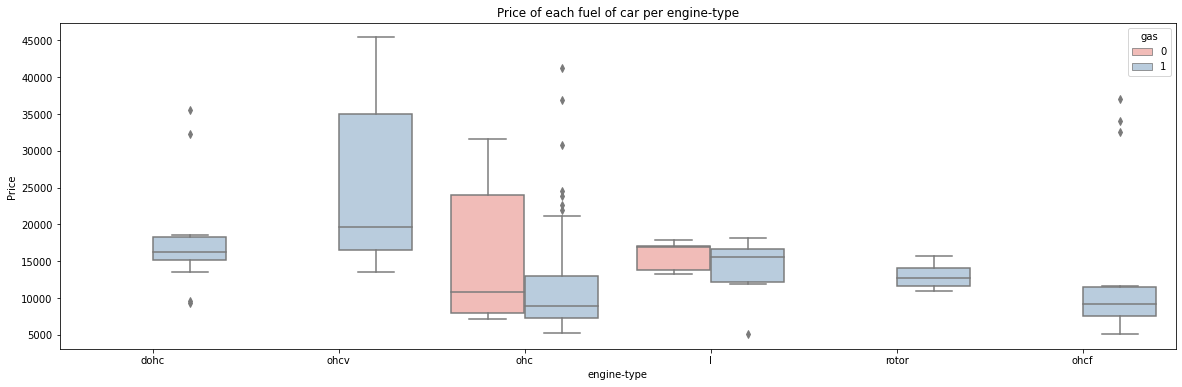

In [25]:
plt.figure(figsize=(20,6))
plots=sns.boxplot(x=data["engine-type"],y=datax["price"],hue=data["gas"])
sns.set_palette("Pastel1",10)
    
plt.xlabel("engine-type")
plt.ylabel("Price")
plt.title("Price of each fuel of car per engine-type")
plt.show()



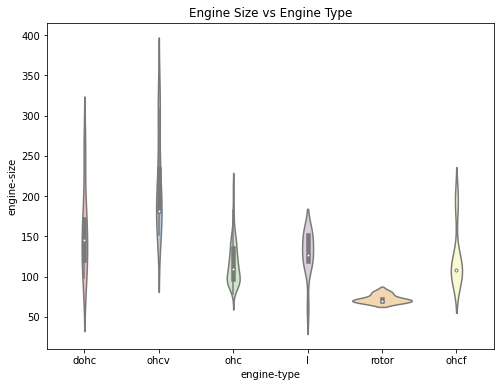

In [26]:
plt.figure(figsize=(8,6))
sns.violinplot(x=data["engine-type"],y=datax["engine-size"])
sns.set_palette("Pastel1",10)
    
plt.xlabel("engine-type")
plt.ylabel("engine-size")
plt.title("Engine Size vs Engine Type")
plt.show()



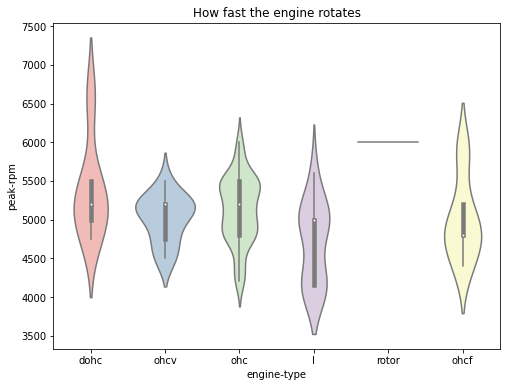

In [27]:
plt.figure(figsize=(8,6))
sns.violinplot(x=data["engine-type"],y=data["peak-rpm"])
plt.title("How fast the engine rotates")
plt.show()

    Standard edition cars prices range are from low to high but mostly below 25000.
    Turbo edition cars ranges 30000 to 7000.
    Hatchback, Sedan and Wagon cars are in both edition (Standard and Turbo)
    OHCV Engine are the costliest one, mostly used in Sedan model cars.
    Only 2 engines are with disel fuel types ohc and I
    OHC is the heavy engine with a size of 400
    Based on rpm, dohc engine's rotating speed is faster than other. Rotor maintains the speed at 6000. 
    Out of these 6 engines, Engine I had a low rotating speed

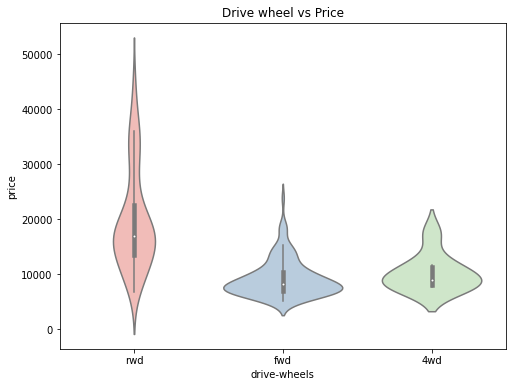

In [28]:
plt.figure(figsize=(8,6))
sns.violinplot(x=data["drive-wheels"],y=data["price"])
plt.title("Drive wheel vs Price")
plt.show()

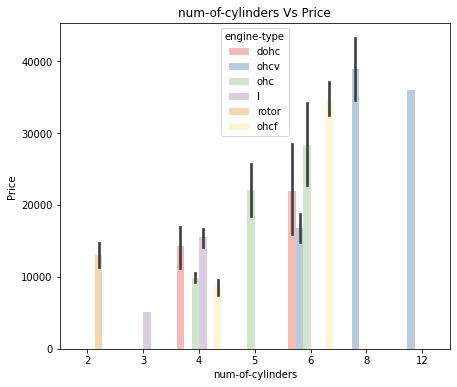

In [29]:
plt.figure(figsize=(7,6))
plots=sns.barplot(x=datax["num-of-cylinders"],y=datax["price"],hue=data["engine-type"])
sns.set_palette("Set2",12)
    
plt.xlabel("num-of-cylinders")
plt.ylabel("Price")
plt.title("num-of-cylinders Vs Price")
plt.show()


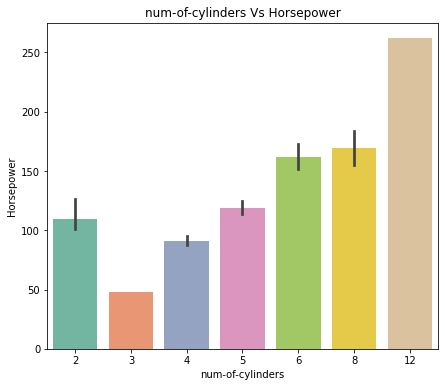

In [30]:
plt.figure(figsize=(7,6))
plots=sns.barplot(x=datax["num-of-cylinders"],y=datax["horsepower"])
sns.set_palette("Set2",12)
    
plt.xlabel("num-of-cylinders")
plt.ylabel("Horsepower")
plt.title("num-of-cylinders Vs Horsepower")
plt.show()


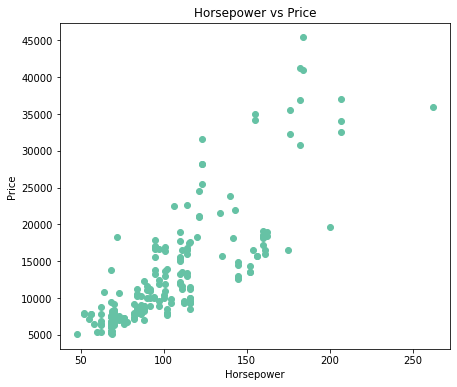

In [31]:
plt.figure(figsize=(7,6))
plt.scatter(datax["horsepower"],datax["price"])
sns.set_palette("Set2",12)
    
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Horsepower vs Price")
plt.show()


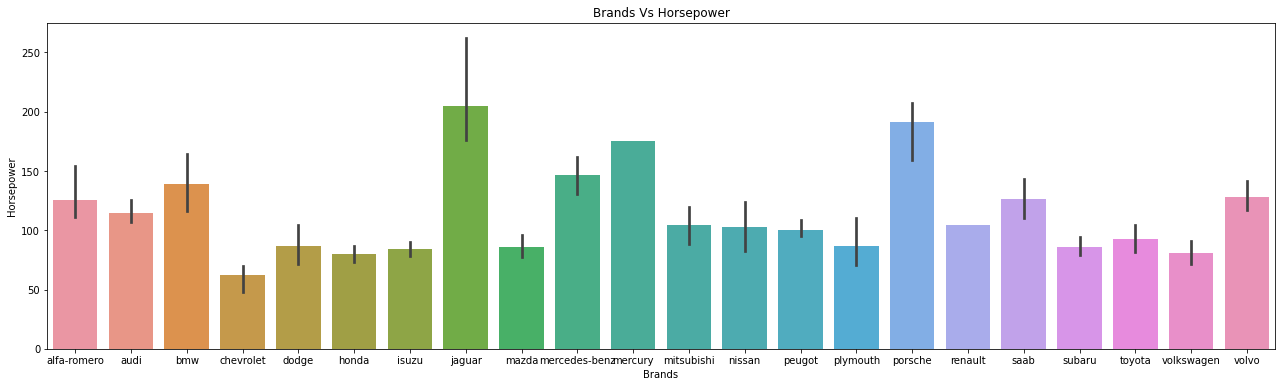

In [32]:
plt.figure(figsize=(22,6))
plots=sns.barplot(x=data["make"],y=datax["horsepower"])
sns.set_palette("Set2",12)
    
plt.xlabel("Brands")
plt.ylabel("Horsepower")
plt.title("Brands Vs Horsepower")
plt.show()


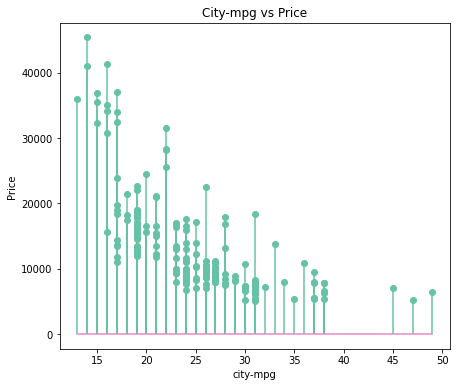

In [33]:
plt.figure(figsize=(7,6))
plt.stem(datax["city-mpg"],datax["price"])
    
plt.xlabel("city-mpg")
plt.ylabel("Price")
plt.title("City-mpg vs Price")
plt.show()


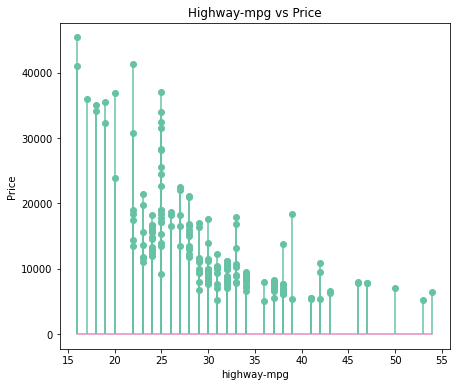

In [34]:
plt.figure(figsize=(7,6))
plt.stem(datax["highway-mpg"],datax["price"])
    
plt.xlabel("highway-mpg")
plt.ylabel("Price")
plt.title("Highway-mpg vs Price")
plt.show()


	cars with high rwd - rear wheel drive are costlier
	Increase in number of cylinders increase in price
	Rotor engine cars have only one cylinder, I engine will have 3-4 cylinders 
	Expect rotor which has 2 cylinders, there is a exponential raise between number of cylinders and horsepower.
	The high budget cars provides high horsepower, exceptionally Mercury a medium budget cars provides till 150 horsepower.
	Most of medium and low budget cars has 70-120 horsepower.
	City-mpg and Highway-mpg has a negative relation with price.



<AxesSubplot:>

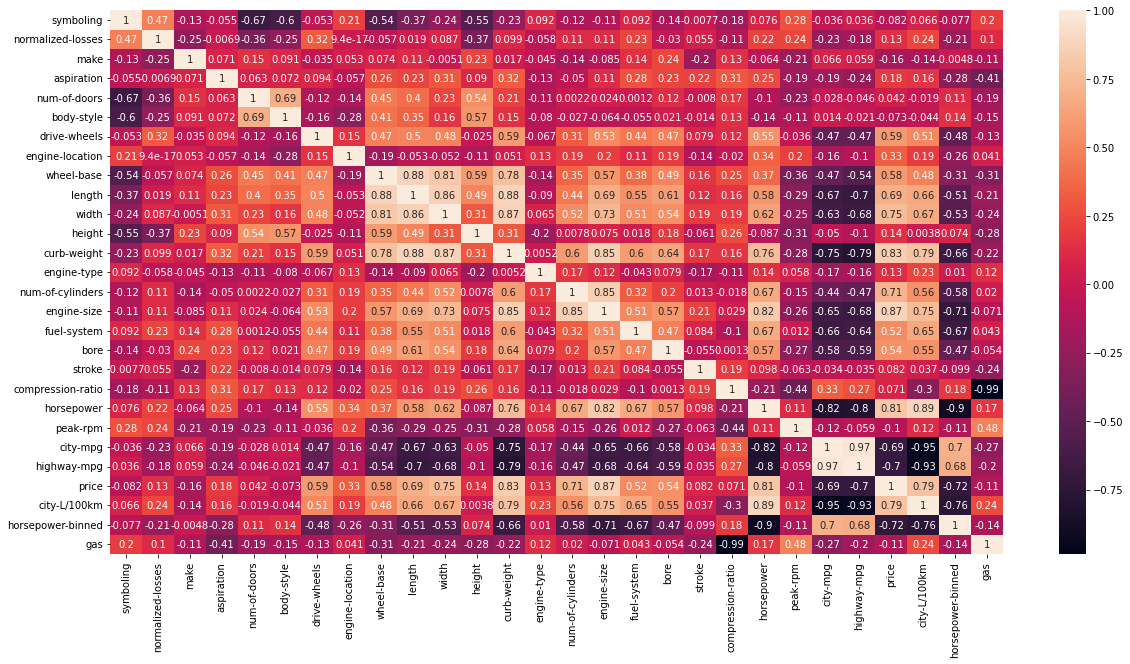

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(datax.corr(),annot=True)

    Horsepower - Engine size - curb-weight are much correlated to Price
    Engine size and curb weight are correlated
    curb weight is correlated with length, width, fuel system of car




<Figure size 1800x1800 with 0 Axes>

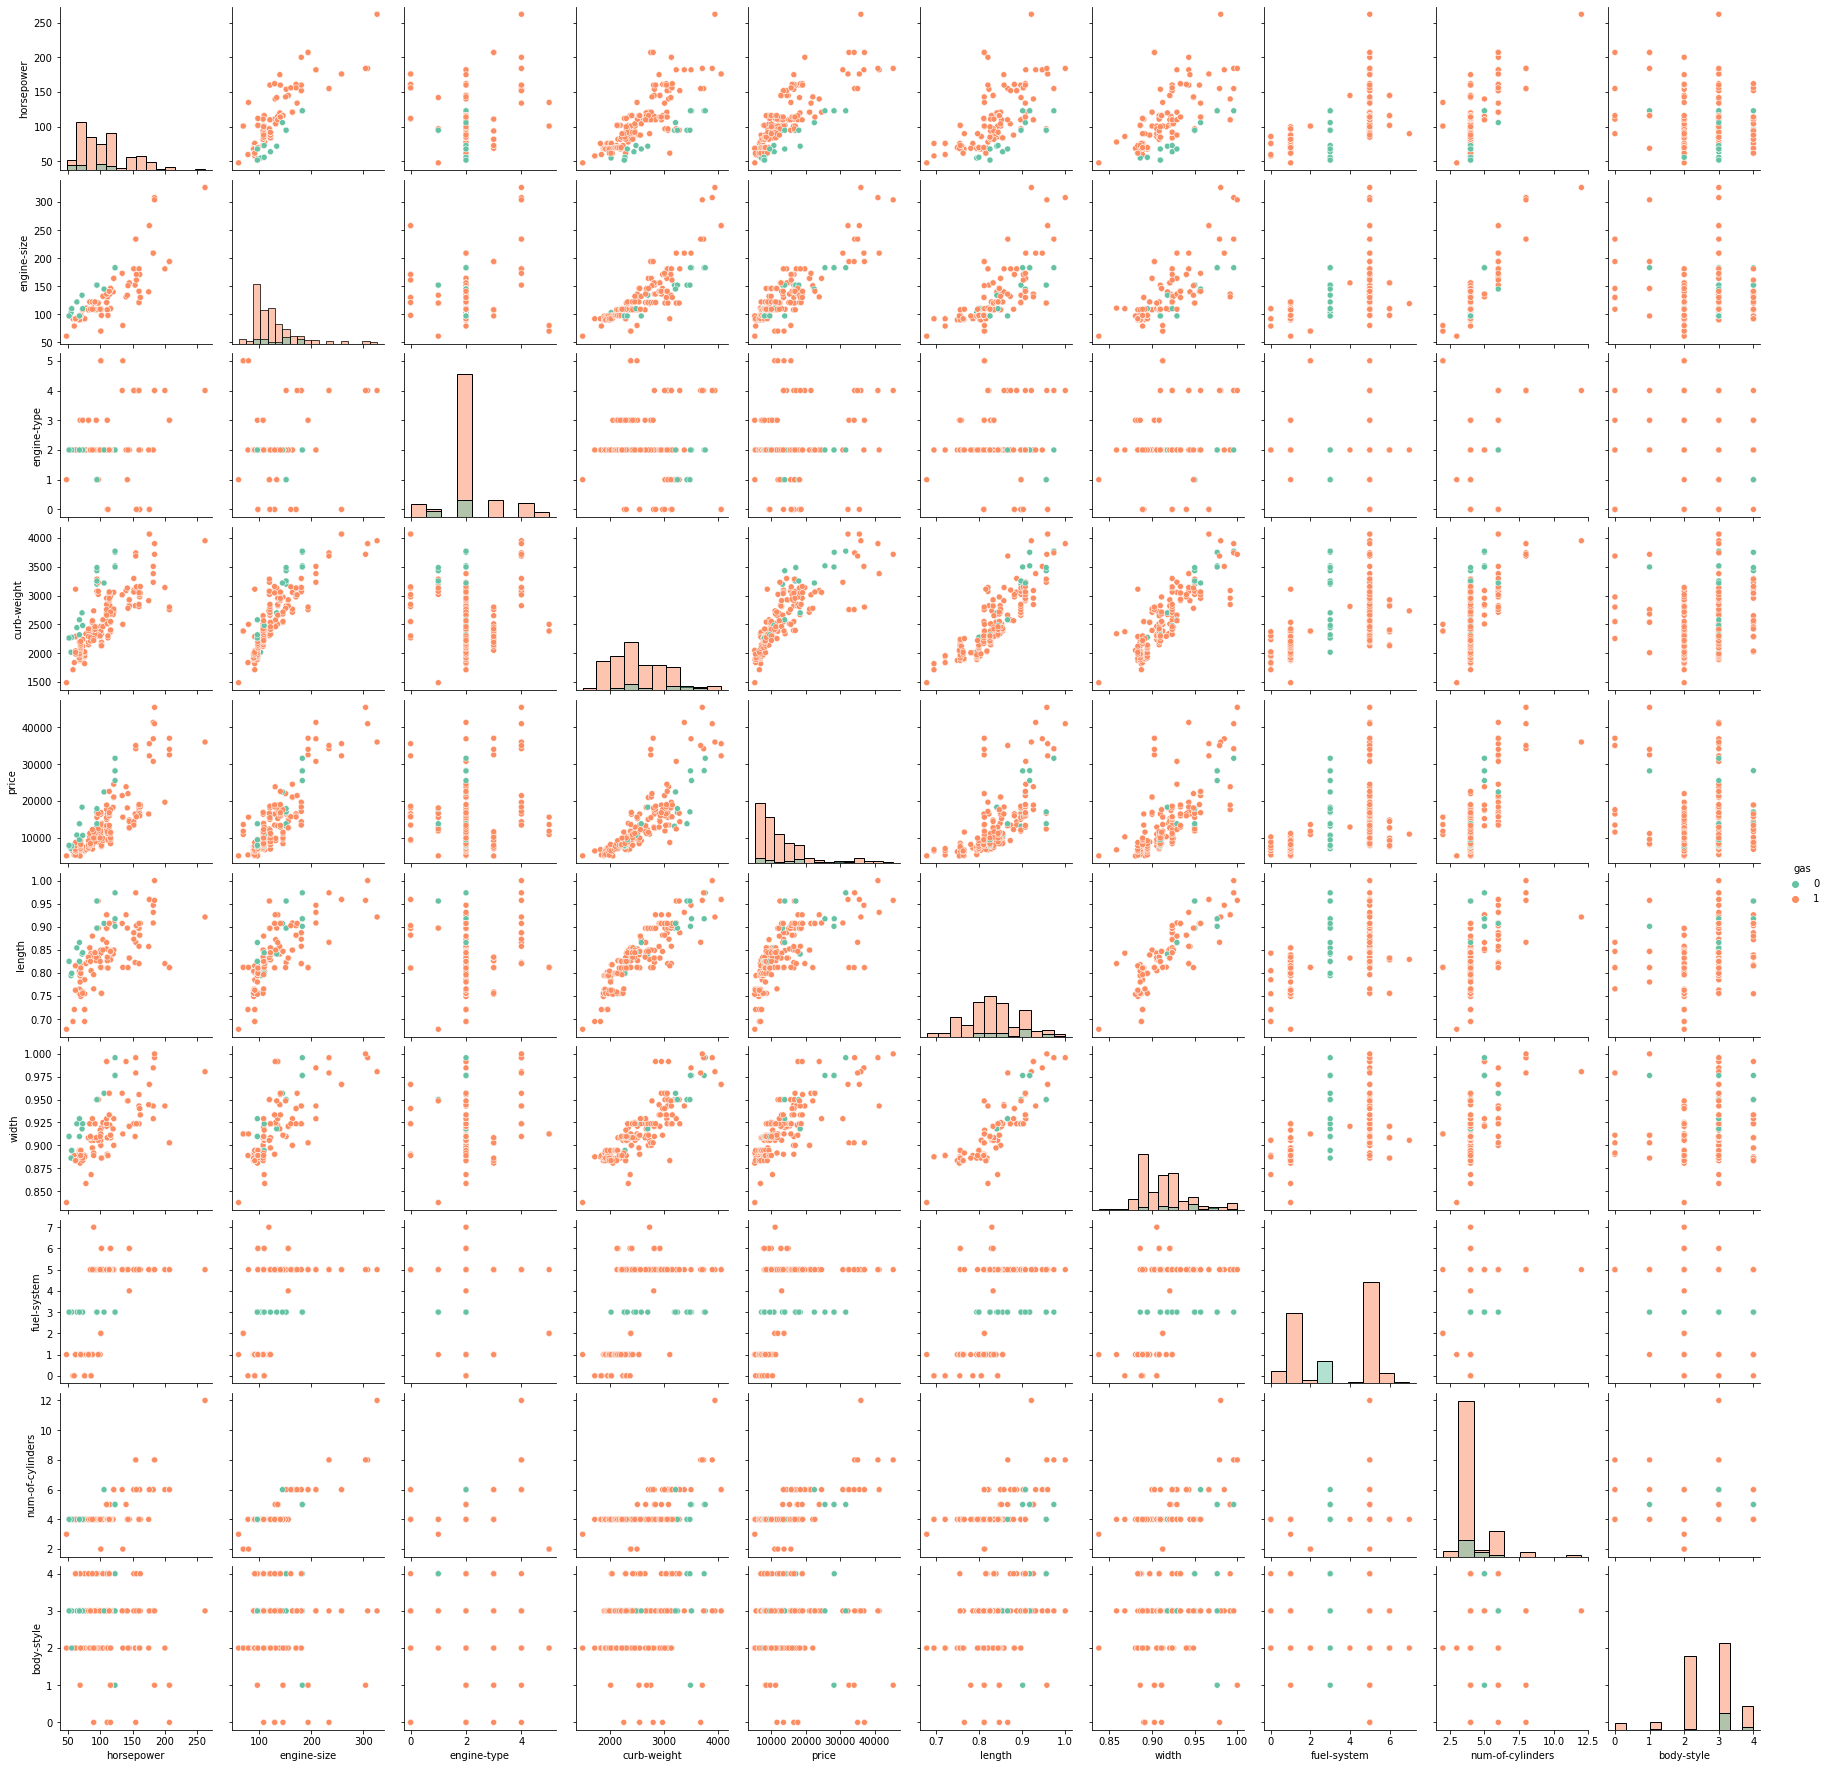

In [38]:
plt.figure(figsize=(25,25))
sns.pairplot(datax[["horsepower","engine-size","engine-type","curb-weight","price","length","width","gas","fuel-system","num-of-cylinders","body-style"]],hue="gas",diag_kind="hist")

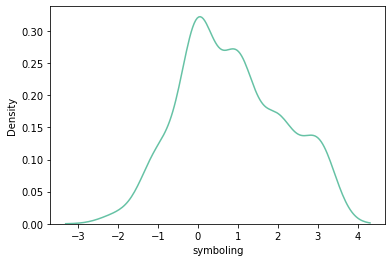

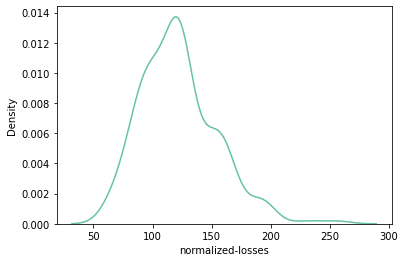

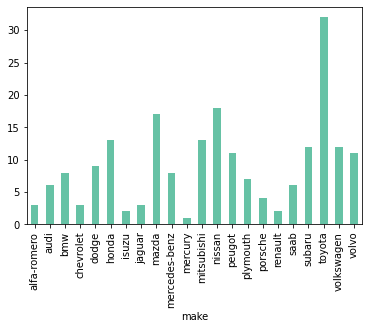

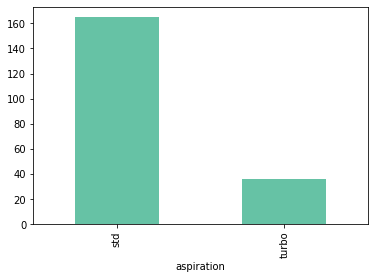

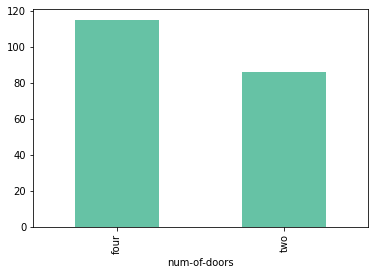

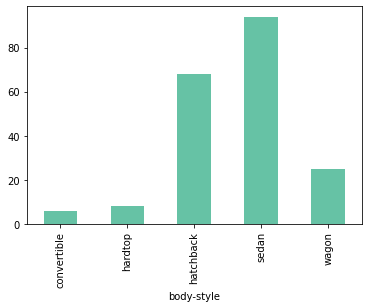

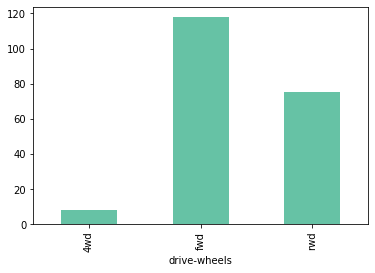

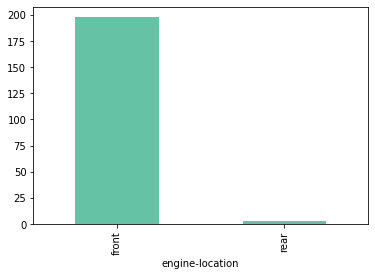

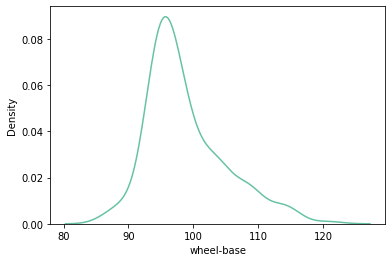

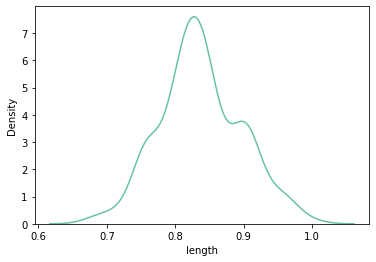

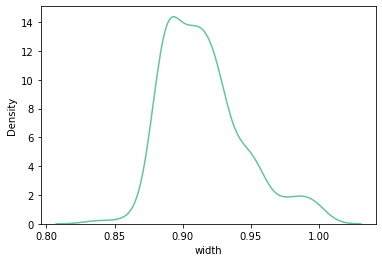

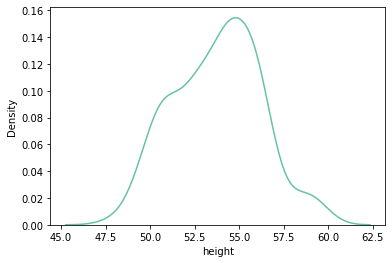

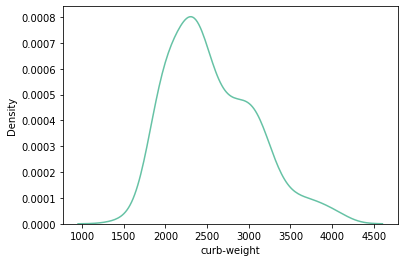

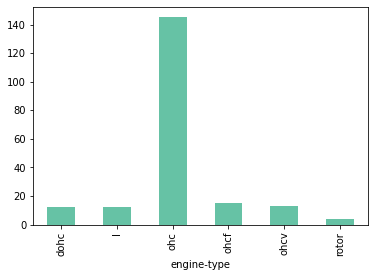

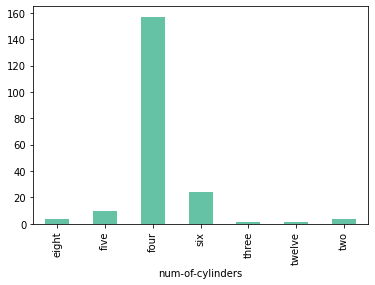

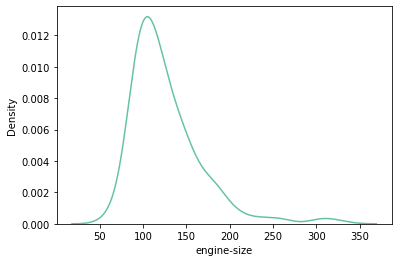

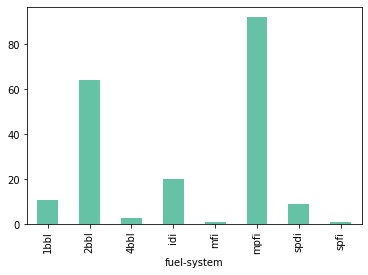

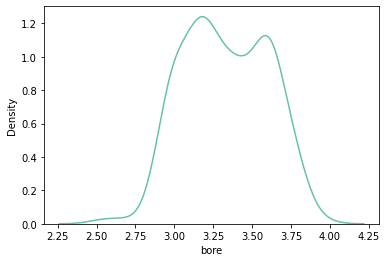

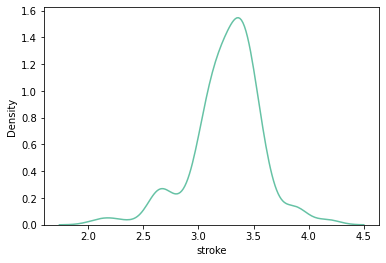

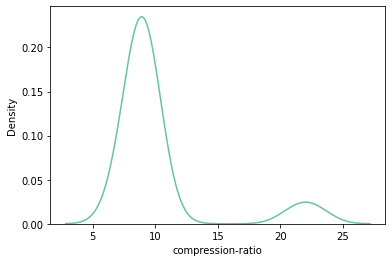

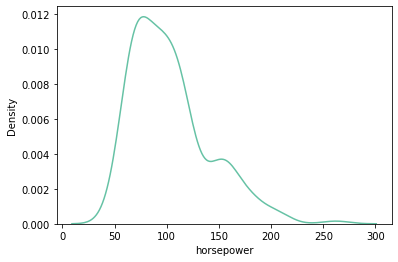

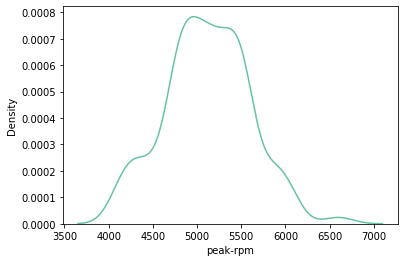

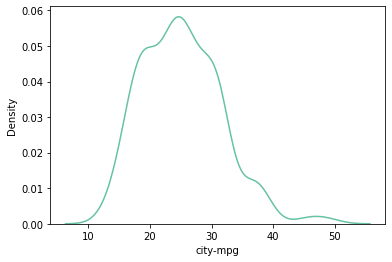

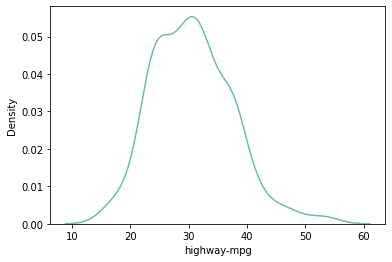

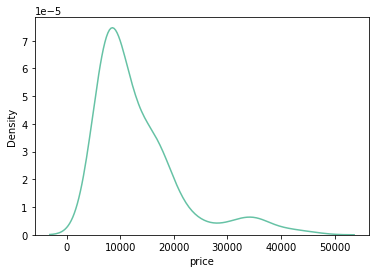

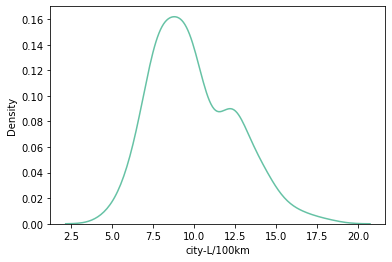

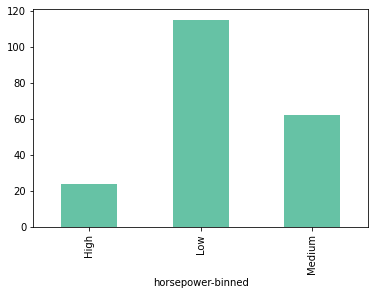

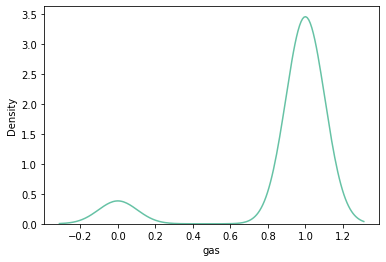

In [51]:
#lets check the distriutions on data
for x in range(len(data.columns)):
    if datax.columns[x] in cat_data.columns:
        data.groupby(by=data.columns[x]).size().plot.bar()
        plt.show()        
    else:
        sns.kdeplot(data[data.columns[x]])
        plt.show()

    Symboling is right skewed data and cars with >0 risk is large comparing to low risk
    Normalized losses are between 75-200
    Toyota is the most sold car in this dataset which offers the low budget cars
    Standard, gas, low horsepower, 4-door,fwd wheel drive,hatchback and sedan,ohc engine cars are high in numbers.
    Length, width, height have somewhat same distribution.
    Most of the car efficiency attributes like horsepower,compressor ratio  are skewed
    
    
    

    From above analysis, Price of cars
        can have much impact from engine size, fuel type, brand (make), number of cylinders.